<a href="https://colab.research.google.com/github/rhiats/classification_CAD/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease**

In [41]:
pip install ucimlrepo

In [42]:
import numpy as np
import pandas as pd

In [43]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
y = np.where(y > 0, 1, 0)
y = pd.DataFrame(y)

In [44]:
y.head()

,0
0,0
1,1
2,1
3,0
4,0


In [45]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [46]:
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [47]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [48]:
list(heart_disease.variables['description'])

[None,
 None,
 None,
 'resting blood pressure (on admission to the hospital)',
 'serum cholestoral',
 'fasting blood sugar > 120 mg/dl',
 None,
 'maximum heart rate achieved',
 'exercise induced angina',
 'ST depression induced by exercise relative to rest',
 None,
 'number of major vessels (0-3) colored by flourosopy',
 None,
 'diagnosis of heart disease']

In [49]:
X = X[['age','sex','trestbps','chol','fbs','thalach','exang','oldpeak','ca']]

In [50]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca
0,63,1,145,233,1,150,0,2.3,0.0
1,67,1,160,286,0,108,1,1.5,3.0
2,67,1,120,229,0,129,1,2.6,2.0
3,37,1,130,250,0,187,0,3.5,0.0
4,41,0,130,204,0,172,0,1.4,0.0


In [51]:
df = X
df['y'] = y

<ipython-input-51-15da3679d863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = y


**Data Set Overview**

In [52]:
print(f"Numer of patients: {X.shape[0]}")

Numer of patients: 303


**Class Imbalance**

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot
labels_cnt_df=df[['y','age']].groupby('y').count().reset_index().rename(columns={'age': 'Count'})
labels_cnt_df

,y,Count
0,0,164
1,1,139


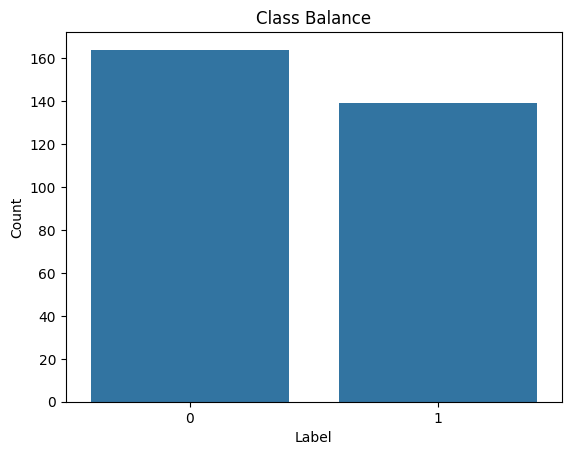

In [54]:
sns.barplot(data=labels_cnt_df, x='y', y='Count')

# Add labels and title
plt.title("Class Balance")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

**T-Test Function**

In [55]:
from scipy.stats import ttest_ind

# Example: Compare Continuous Feature between Healthy and CAD groups

def ttest(df,var_name):
  """
    Hypothesis Test of a T-Test to compare the means of the healthy
    and unhealthy patients.

    @p var_name: The name of the variable in the dataframe to test.
    @return: None
  """
  group1 = df[df['y'] == 0][var_name]  # Healthy
  group2 = df[df['y'] == 1][var_name]  # CAD

  t_stat, p_value = ttest_ind(group1, group2)
  print("t-statistic:", t_stat)
  print("p-value:", p_value)

  if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")

**Chi Square Test of Independence**

In [75]:
from scipy.stats import chi2_contingency

def chi_square_test(df,var_name):
  """
    Chi Square Test of Independence to compare the means of the healthy
    and unhealthy patients.

    @p var_name: The name of the variable in the dataframe to test.
    @return: None
  """
  # Step 1: Create a contingency table
  # (rows = sex, columns = heart disease status)
  contingency = pd.crosstab(df[var_name], df['y'])

  # Step 2: Perform the Chi-Square test
  chi2, p, dof, expected = chi2_contingency(contingency)

  # Step 3: Print results
  print("Chi-Square Statistic:", chi2)
  print("p-value:", p)
  print("Degrees of Freedom:", dof)
  #print("Expected Frequencies:\n", expected)
  if p < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the fequencies of the two groups.")

**Age Distribution by Class and T-Test**

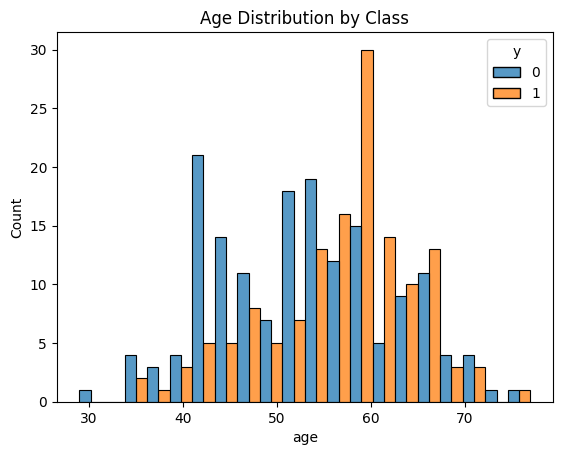

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='age', hue='y', multiple='dodge', bins=20)
plt.title('Age Distribution by Class')
plt.show()

In [58]:
CAD_patients_60s = df[(df['age'] >= 60) & (df['age'] < 70) & (df['y'] > 0)].shape[0]
Healthy_patients_60s = df[(df['age'] >= 60) & (df['age'] < 70)].shape[0]

print(f"Number of healthy patients between 60 and 70: {Healthy_patients_60s}")
print(f"Number of CAD patients between 60 and 70: {CAD_patients_60s}")
print(f"Percentage of healthy patients between 60 and 70: {Healthy_patients_60s / df.shape[0] * 100:.2f}%")

Number of healthy patients between 60 and 70: 81
Number of CAD patients between 60 and 70: 49
Percentage of healthy patients between 60 and 70: 26.73%


In [59]:
ttest(df,'age')

t-statistic: -3.971100226293655
p-value: 8.955636917529706e-05
Reject the null hypothesis. There is a significant difference between the means of the two groups.


**Sex Bar Graph**

In [60]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,y
0,63,1,145,233,1,150,0,2.3,0.0,0
1,67,1,160,286,0,108,1,1.5,3.0,1
2,67,1,120,229,0,129,1,2.6,2.0,1
3,37,1,130,250,0,187,0,3.5,0.0,0
4,41,0,130,204,0,172,0,1.4,0.0,0


In [61]:
#1 is male
gender_cnt_df=X[['sex','age']].groupby('sex').count().reset_index()
gender_cnt_df.rename(columns={'age': 'Count'}, inplace=True)
gender_cnt_df['Relative_Frequency'] = gender_cnt_df['Count'] / gender_cnt_df['Count'].sum()
gender_cnt_df

,sex,Count,Relative_Frequency
0,0,97,0.320132
1,1,206,0.679868


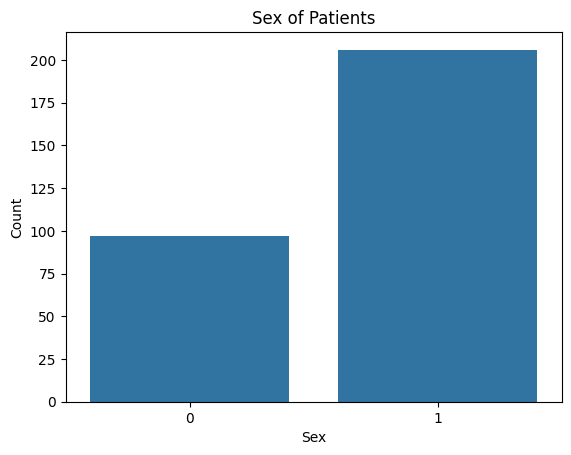

In [62]:
sns.barplot(data=gender_cnt_df, x='sex', y='Count')

# Add labels and title
plt.title("Sex of Patients")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Does heart disease (Yes/No) depend on sex (Male/Female)? Chi-Square Test of Independence**

In [74]:
chi_square_test(df,'sex')

Chi-Square Statistic: 22.042560606155472
p-value: 2.666712348180942e-06
Degrees of Freedom: 1
Reject the null hypothesis. There is a significant difference between the means of the two groups.


**Resting Blood Pressure Distribution and T-Test**

**Cholesterol Distribution and T-Test**

**Fasting Blood Sugar Bar Graph**

In [64]:
fs_bd_cnt_df=X[['fbs','age']].groupby('fbs').count().reset_index()
fs_bd_cnt_df.rename(columns={'age': 'Count'}, inplace=True)
fs_bd_cnt_df

,fbs,Count
0,0,258
1,1,45


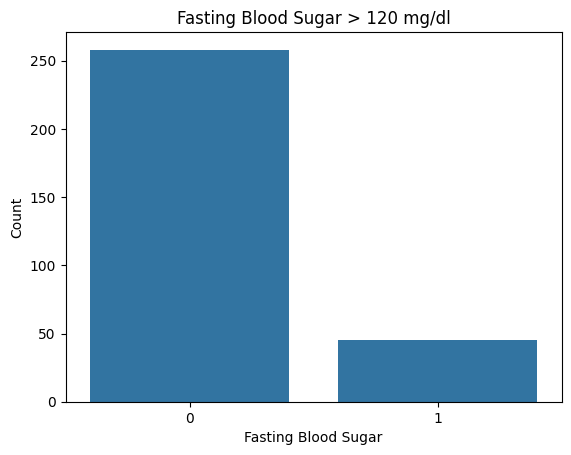

In [65]:
sns.barplot(data=fs_bd_cnt_df, x='fbs', y='Count')

# Add labels and title
plt.title("Fasting Blood Sugar > 120 mg/dl")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.show()

**Chi-Square Test of Independence: Does Heart Disease depend on Fasting Blood Sugar?**

**Exercise Induced Angina Bar Graph**

**ST Depression Distribution and T-Test**

**Bar Graph Number of Major Vessels Fluorescing**

**Maximum Heart Rate Achieved Distribution**

**Standardize Features**

**Visualize Classes**

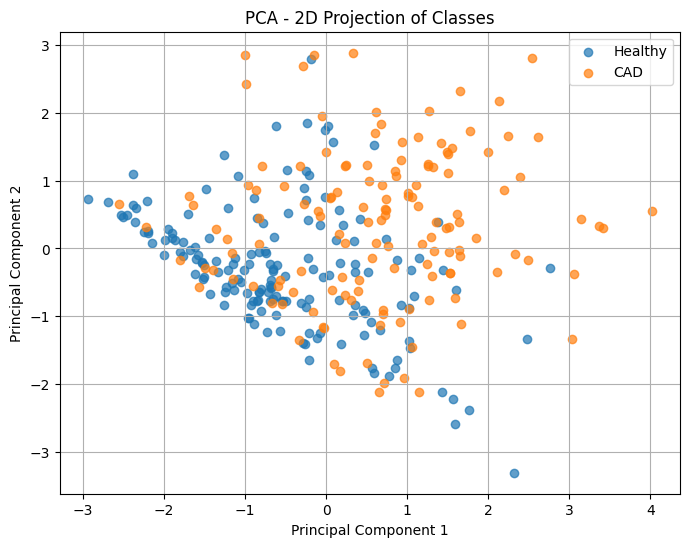

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = X[['age','trestbps','chol','exang','oldpeak']]
y_binary = np.where(y > 0, 1, 0)  # Ensure binary classes: 0 or 1
class_names = ['Healthy', 'CAD']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y_binary

# Plot
plt.figure(figsize=(8, 6))
for label in np.unique(y_binary):
    plt.scatter(df_pca[df_pca['label'] == label]['PC1'],
                df_pca[df_pca['label'] == label]['PC2'],
                label=class_names[label],
                alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection of Classes')
plt.legend()
plt.grid(True)
plt.show()

**Logistic Regression with Feature Selection**

**Linearly Separable Equation**

In [67]:
import numpy as np

df_subset = X[['age','trestbps','chol','exang','oldpeak']]
df_subset["y"] = y

# Assume X is (n_samples, n_features), y is (n_samples,)
class_0 = df_subset[df_subset["y"] == 0]
class_1 = df_subset[df_subset["y"] > 0]

centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

print("Centroid Class 0:", centroid_0)
print("Centroid Class 1:", centroid_1)

Centroid Class 0: age          52.585366
trestbps    129.250000
chol        242.640244
exang         0.140244
oldpeak       0.586585
y             0.000000
dtype: float64
Centroid Class 1: age          56.625899
trestbps    134.568345
chol        251.474820
exang         0.546763
oldpeak       1.574101
y             1.000000
dtype: float64


In [68]:
w = centroid_1 - centroid_0  # direction vector

In [69]:
midpoint = (centroid_0 + centroid_1) / 2  # midpoint is the decision boundary

In [70]:
print("Midpoint:", midpoint)
print("Direction vector (normal):", w)

Midpoint: age          54.605633
trestbps    131.909173
chol        247.057532
exang         0.343503
oldpeak       1.080343
y             0.500000
dtype: float64
Direction vector (normal): age         4.040533
trestbps    5.318345
chol        8.834576
exang       0.406519
oldpeak     0.987515
y           1.000000
dtype: float64


In [72]:
def predict_linear_separator(X, w, midpoint):
    projections = (df_subset - midpoint) @ w
    return (projections > 0).astype(int)  # class 1 if on centroid_1's side

y_pred = predict_linear_separator(df.drop(columns=['y'], axis=1), w, midpoint)

accuracy = np.mean(y_pred == df["y"])
print(f"Centroid-separator accuracy: {accuracy:.2f}")

Centroid-separator accuracy: 0.57


**Nonlinear SVM (Kernel SVM)**

**Random Forest**

**Multi-Layer Perceptron - A Deep Learning Model**

**ROC Curve**

**Accuracy**

**Sensitivity**

**Specificitiy**

**Precision**

**Confusion Matrix**

****